## 01) Word Embedding
* 단어를 벡터로 표현하는 방법
* 단어를 밀집 표현으로 변환

### 1. 희소 표현 Sparse Representation
* 정의: 벡터/행렬의 값이 대부분이 0으로 표현되는 방법
  * 원-핫 벡터는 희소 벡터
* 문제점: 단어 개수 늘어나면 벡터의 차원이 한없이 커짐.. 공간적 낭비 + 단어의 의미 담지 못함

### 2. 밀집 표현 Dense Representation
  * 벡터의 차원을 단어 집합의 크기로 상정하지 않음
  * 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
  * 0과 1만이 아니라 실수값 가짐

### 3. 워드 임베딩
  * 단어를 dense vector의 형태로 표현하는 방법
  * Aka Embedding vector (밀집 벡터를 워드 임베딩 과정을 통해 나온 결과)
  * ex) LSA, Word2Vec, FastText, Glove

## 02) Word2Vec
* 단어 간 유사도를 반영할 수 있도록 단어의 의미 벡터화 해야됨
### 1. 희소 표현 Sparse Representation
  * 희소 벡터(ex. 원-핫 벡터)는 각 단어 간 유사성 표현 못함
    * 단어의 '의미'를 다차원 공간에 벡터화. 이러한 표현 방법을 **분산 표현(Distributed represntation)**

### 2. 분산 표현 Distributed Representation
  * Based on 분포 가설 Distributional hypothesis: 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가짐
  * 요약: 희소 차원은 고차원에 각 차원이 분리된 표현 방법, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현. ==> 단어 간 유사도 계싼 가능

### 3. CBOW(Continuous Bag of Words)
  * Word2Vec은 CBOW와 Skip-Gram 두 가지
  * CBOW: 주변에 있는 단어(context word)들을 가지고 중간에 있는 단어(center word) 예측
  * Skip-Gram: 중간에 있는 단어로 주변 단어들을 예측  

  * Window: 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지 범위
  * Sliding window: Window를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터셋 만들기

  * 과정 설명: 
  1. 입력층의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안 주변 단어들의 원-핫 벡터가 들어감
  2. 출력층에서 예측하고자 하는 '중간 단어의 원-핫 벡터'가 필요
    * 이는 Word2Vec의 학습을 위해서 필요
  * 추가: Word2Vec은 Deep Learning Model이 아님.
    * 딥러닝: 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망 학습
    * Word2vec: 입력층과 출력층 사이 하나의 은닉층만 존재. Shallow Neural Network
      * (+) 은닉층에 활성화 함수 존재하지 않으며, 룩업 테이블이라는 연산을 담당하는 층.. 그래서 투사층 projection layer이라고도 부름  

  * 동작 메커니즘:
  1. 투사층의 크기가 M(입력층은 VxM)
  2. 입력층과 투사층 사이의 가중치 W는 VxM, 투사층과 출력층 사이의 가중치 W'는 MxV
  * 투사층에서 평균을 구하는 부분은 **CBOW가 Skip-Gram과 다른 차이점**
    * Skip-Gram은 입력이 중심 단어 하나. 투사층에서 벡터의 평균을 구하지 않음

### 4. Skip-Gram
  * 전반적으로 성능 더 좋음  

### 5. NNLM vs. Word2Vec
#### 차이점
1. 
  * 신경망 언어 모델(NNLM): 언어 모델로 **다음 대상 예측**
  * Word2Vec: 워드 임베딩 자체가 목적. **다음 단어가 아닌 중심 단어를 예측하여 학습**
    * => NNLM은 예측 단어의 이전 단어들만 참고, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고
2. Word2Vec은 NNLM에 존재하던 활성화 함수가 있는 은닉층 제거
  * 투사층 다음에 바로 출력층으로 연결
* (+) 속도에 차이나는 이유
  * 계층적 소프트맥스(Hierarchical softmax)와 네거티브 샘플링(Negative sampling)
    * Word2Vec은 출력층에서의 연산에서 V를 log(V)로 바꿔 배는 빠른 학습속도 가짐

## 03) 영어/한국어 Word2Vec 실습
* gensim 패키지 이용

### 1. 영어 Word2Vec 만들기

In [3]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fa4eebbe550>)

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* 훈련 데이터 파일은 xml 문법으로 작성되어 있어 자연어 얻기 위해서는 전처리 필요
  * <content>와 </content> 사이의 내용만
* 배경음 나타내는 (Laughter), (Applause)도 제거

In [6]:
# 전처리 코드
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규표현식의 sub 모듈로 content 중간의 (Audio), (Laughter) 등의 배경음 부분 제거
# 해당 코드는 괄호로 구성된 내용 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점 제거, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
  normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [8]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

Word2Vec의 하이퍼 파라미터값
* size: 워드 벡터의 특징 값. 임베딩된 벡터의 차원
* window: context window 크기
* min_count: 단어 최소 빈도 수 제한
* workers: 학습을 위한 프로세스 수
* sg: 0은 cbow, 1은 skip-gram

In [10]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [11]:
# Word2Vec에 대해서 학습 진행
# 입력 단어에 대해서 가장 유사한 단어 출력

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8435317277908325), ('guy', 0.7985468506813049), ('lady', 0.7817904949188232), ('boy', 0.7606765031814575), ('gentleman', 0.7366722822189331), ('girl', 0.7296925187110901), ('soldier', 0.7029783725738525), ('kid', 0.7020815014839172), ('poet', 0.6805630326271057), ('king', 0.66712486743927)]


In [12]:
# Word2Vec 모델 저장하고 로드
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') #모델 로드

In [13]:
# 로드한 모델에 대해서 다시 man과 유사한 단어 출력
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8435317277908325), ('guy', 0.7985468506813049), ('lady', 0.7817904949188232), ('boy', 0.7606765031814575), ('gentleman', 0.7366722822189331), ('girl', 0.7296925187110901), ('soldier', 0.7029783725738525), ('kid', 0.7020815014839172), ('poet', 0.6805630326271057), ('king', 0.66712486743927)]


### 2. 한국어 Word2Vec 만들기 (네이버 영화 리뷰)

In [16]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 448 kB 65.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [18]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fa4cb26d110>)

In [19]:
train_data = pd.read_table('ratings.txt')

In [20]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [21]:
print(len(train_data))

200000


In [ ]:
# null 값 존재 유무 확인
print(train_data.isnull().values.any())

In [22]:
train_data = train_data.dropna(how = 'any') #null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [24]:
print(len(train_data))

199992


In [25]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [26]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [27]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# import tqdm

In [31]:
from tqdm import tqdm

In [32]:
# 형태소 분석기 okt 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 형태소분석.. 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [20:18<00:00, 164.09it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


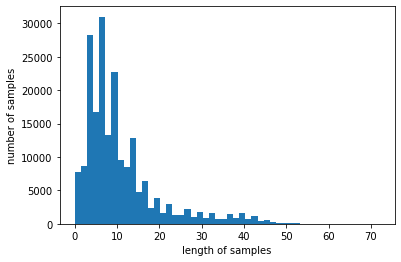

In [33]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [46]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [47]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [48]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8778828382492065), ('송강호', 0.8502885103225708), ('박중훈', 0.850069522857666), ('이정재', 0.8448969721794128), ('최민수', 0.844124972820282), ('엄정화', 0.8440042734146118), ('강지환', 0.842502236366272), ('김명민', 0.837706446647644), ('안성기', 0.8365885019302368), ('주진모', 0.833758533000946)]


In [49]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8730586767196655), ('호러', 0.8645143508911133), ('슬래셔', 0.8605858087539673), ('느와르', 0.8421926498413086), ('물', 0.8336173295974731), ('무비', 0.8279067277908325), ('멜로', 0.811174213886261), ('물의', 0.8094125390052795), ('헐리우드', 0.7883111238479614), ('교과서', 0.7843461036682129)]


### 3. 사전 훈련된 Word2Vec 임베딩(Pretrained Word2Vec embedding) 소개
* 구글이 제공하는 사전 훈련된 Word2Vec 모델 사용
* 사전훈련된 3백만 개의 단어 벡터 제공
* 각 임베딩 벡터의 차원은 300

In [50]:
import gensim

In [53]:
!git clone https://github.com/mmihaltz/word2vec-GoogleNews-vectors.git

Cloning into 'word2vec-GoogleNews-vectors'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [54]:
import os

os.listdir('word2vec-GoogleNews-vectors')

['README.md',
 'GoogleNews-vectors-negative300.bin.gz',
 '.gitattributes',
 '.git']

In [62]:
#a = os.system('GoogleNews-vectors-negative300.bin.gz')
#path = get_file(MODEL + '.gz', 'https://deeplearning4jblob.blob.core.windows.net/resources/wordvectors/%s.gz' % MODEL)
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
 
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz",binary = True)


--2021-10-22 14:31:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.133.48
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.133.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  15.4MB/s    in 1m 46s  

2021-10-22 14:33:05 (14.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [57]:
# import zipfile

# zip_file=zipfile.ZipFile("test.zip")
# zip_file.extractall()

32512

In [ ]:
# model = gensim.models.KeyedVectors.load_word2vec_format('', binary=True)

In [63]:
print(model.vectors.shape)

(3000000, 300)


In [64]:
print (model.similarity('this', 'is'))
print (model.similarity('post', 'book'))

0.40797037
0.057204384


In [65]:
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

최근 Word2Vec은 추천시스템에도 사용됨

## 04) 네거티브 샘플링을 이용한 Word2Vec 구현 Skip-Gram with Negative Sampling
### 1. 네거티브 샘플링
* Word2Vec의 출력층: 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트
* 네거티브 샘플링: Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 함
  * 하나의 중심 단어에 대해서 작은 단어 집합 만든 후 마지막 단계를 이진 분류 문제로 변환
  * 기존의 단어 집합의 크기만큼 선택지를 두고 다중 클래스 분류 문제를 풀던 Word2Vec보다 훨씬 연산량에서 효율적


### 2. 네거티브 샘플링 Skip-Gram (SGNS)
* Skip-Gram: 입력은 중심 단어, 모델의 예측은 주변 단어
* SGNS: 중심 단어와 주변 단어 **모두**가 입력, 이 **두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계**인지 그 확률 예측  
  > 주변 단어 관계까 아닌 단어들을 입력2로 삼기 위하여 레이블을 0으로  

* 두 테이블 중 하나는 입력 1인 중심단어의 테이블 룩업을 위한 임베딩 테이블, 하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블
* 각 임베딩 테이블을 통해 테이블 룩업하여 임베딩 벡터로 변환
* 중심 단어와 주변 단어의 내적값을 이 모델의 예측값, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트

### 3. 20 뉴스그룹 데이터 전처리하기

In [35]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [37]:
# 하나의 샘플에 최소 단어 2개는 있어야 함
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 : ', len(documents))

총 샘플 수 :  11314


In [41]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3 이하인 단어는 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [42]:
# null값 있는지 확인
news_df.isnull().values.any()

False

In [43]:
# 빈 값 유무 확인
# 모든 빈 값을 Null 값으로 변환, 다시 확인
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [44]:
# Null값 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [67]:
# 불용어 제거하여 단어의 수 줄어듦. 모든 샘플 중 단어가 1개 이하인 경우 모두 찾아 제거
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [68]:
# 단어 집합 생성, 정수 인코딩 진행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [69]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [70]:
# 단어 집합 크기 확인
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


### 4. 네거티브 샘플링 통한 데이터셋 구성
* 토큰화, 정제, 정규화, 불용어 제거, 정수 인코딩까지 일반적인 전처리 과정 거침
* 네거티브 샘플링 위해서 keras의 skipgrams 사용
* 상위 10개의 뉴스그룹 샘플에 대해서만 수행

In [71]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [72]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
      print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(guilt (4989), chow (20699)) -> 0
(existance (4865), achtung (26602)) -> 0
(israeli (442), thermocouple (63915)) -> 0
(subsidizing (15228), degree (1530)) -> 1
(think (6), sodom (13039)) -> 0


In [73]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [74]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [75]:
# 모든 뉴스그룹 샘플에 대해서 수행
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

### 5. Skip-Gram with Negative Sampling SGNS 구현

In [76]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
# 임베딩 벡터 차원
embed_size = 100

In [ ]:
# 모델 설계
# 두 개의 임베딩 테이블 생성

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [ ]:
# 각 단어는 임베딩 테이블을 거쳐 내적 수행, 내적의 결과는 1 또는 0으로 예측하기 위해서 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값 얻음
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [ ]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
# 모델의 학습
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

### 6. 결과 확인

In [ ]:
import gensim

# 학습된 임베딩 벡터들은 vector.txt에 저장
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
# 쉽게 유사도 구할 수 있음
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)
w2v.most_similar(positive=['soldiers'])

In [ ]:
w2v.most_similar(positive=['doctor'])

In [ ]:
w2v.most_similar(positive=['police'])

In [ ]:
w2v.most_similar(positive=['knife'])

In [ ]:
w2v.most_similar(positive=['engine'])

## 05) 글로브 GloVe
* 카운트 기반과 예측 기반을 모두 사용하는 방법론
* 2014년에 미국 스탠포드 대학에서 개발한 단어 임베딩 방법론
* 앞서 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반 Word2Vec의 단점 지적하며 이를 보완

### 1. 기존 방법론에 대한 비판
* LSA: DTM이나 TD-IDF 행렬과 같이 **각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미 끌어내느 방법론**
  * 카운트 기반으로 코퍼스의 전체적인 통계 정보 고려. 하지만 **단어 의미의 유추 작업 Analogy task에는 성능이 떨어짐**  

* Word2Vec: 예측 기반. 단어 간 유추 작업에는 LSA보다 뛰어남. **임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보 반영 못함**
* 이러한 점을 비판하여 카운트 기반과 예측 기반 방법론 두 가지 모두 사용

### 2. 윈도우 기반 동시 등장 행렬 Window based Co-occurrence Matrix
* 단어의 동시 등장 행렬 Co-occurrence Matrix: 행과 열을 전체 단어 집합의 단어들로 구성. 
  * i 단어의 Window Size 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
  * Transpose해도 동일한 행렬이 된다는 특징


### 3. 동시 등장 확률 Co-occurence Probability
* P(k|i): 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
  * i: Center Word, k: Context Word
  * 중심 단어 i의 행의 모든 값을 더한 값을 분모, i행 k열의 값을 분자로 한 값


### 4. 손실 함수 Loss Function
* X: 동시 등장 행렬 Co-occurence Matrix
* Xij: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
* sigma j Xij: 동시 등장 행렬에서 i행의 값을 모두 더한 값
* Pik = P(k|i) = Xik/Xi: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률
  * ex) P(solid|ice) =  ice가 등장했을 때 solid가 등장할 확률
* Pik/Pjk
  ex) P(solid|ice)/P(solid|steam) = 8.9
* wi: 중심 단어 i의 임베딩 벡터
* ὦk: 주변 단어 k의 임베딩 벡터



* GloVe in one sentence
  > 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서 동시 등장 확률이 되도록 만드는 것
  > dot product(wi ὦk) ≈ P(k|i) = Pik

  > 더 정확하게는,
  > dot product(wi ὦk) ≈ logP(k|i) = logPik 

* 손실 함수: 단어 간의 관계 잘 표현해야 함
  > F(wi, wj, ὦk) = Pik/Pjk
* F의 목적: 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩 하는 것이 목적
* F의 입력: 
  > F(wi - wj, ὦk) = Pik/Pjk
* 우변은 스칼라, 좌변은 벡터. Dot product 수행
  > F((wi - wj)Tὦk) = Pik/Pjk
  * Linear space에서의 단어 의미 관계 표현 위해 뺄셈과 내적 택함  


* F가 만족해야 할 필수 조건: 중심 단어 w와 주변 단어 ὦ라는 선택 기준은 실제로는 무작위 선택이므로 둘의 관계는 자유롭게 교환될 수 있도록 해야됨
  * **F가 실수의 덧셈과 양수의 곱셈에 대해서 *준동형 Homomorphism*을 만족하도록 함**
    > F(a+b) = F(a)F(b)
* F에 적용
  > F(v1Tv2 + v3Tv4) = F(v1Tv2)F(v3Tv4)
* 뺄셈에 대한 준동형식으로 변경
  > F(v1Tv2 - v3Tv4) = F(v1Tv2) / F(v3Tv4)
* 이를 Glove씩에 적용
  > F((wi - wj)Tὦk) = F(wiTὦk) / F(wjTὦk)
* 우변
  > Pik/Pjk = F(wiTὦk) / F(wjTὦk)
  > F(wiTὦk) = Pik = Xik/Xi
* 좌변
  > F(wiTὦk - wjTὦk) = F(wiTὦk) / F(wjTὦk)

* F 함수에 지수 함수
  > expF(wiTὦk - wjTὦk) = expF(wiTὦk) / expF(wjTὦk)

  > wiTὦk = logPik = log(Xik/Xi) = logXik - logXi

* wi와 ὦk는 값 바뀌어도 식 성립
* logXi항을 wi에 대한 편향 bi로 대체
  > wiTὦk + bi + b tilde - logXik
* 손실함수 일반화
  * Loss func = V sigma m, n = (wmTὦn + bm + b tilde n - logXmn)^2
    * V는 단어 집합의 크기. 
    * Still 문제.. 
        * logXik에서 Xik 값이 0이 될 수 있으므로 log(1+Xik)로 변경
        * 동시 등장 행렬 X는 DTM처럼 희소 행렬 Sparse Matrix일 가능성 다분.
          * Xik 갑에 영향을 받는 가중치 함수 Weighting function f(Xik)를 손실 함수에 도임
            * Xik 값이 작으면 상대적으로 함수의 값은 작은데, 크면 최대값이 정해져 있음
              > f(x) = min(1, (x/xmax)^3/4)
* **최종**
  > Loss func = V sigma m, n = f(Xmn)(wmTὦn + bm + b tilde n - logXmn)^2        


### 5. GloVe 훈련시키기

In [102]:
!python -m pip install glove_python_binary

In [113]:
# glov_python_library가 계속 import error가 나서 대신 mittens를 사용했음
# 근데 mittens에는 Corpus가 없어 오류가 남..
!pip install -U mittens
from mittens import GloVe as Glove

In [ ]:
# from glove_pybind import *
# from .Glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

In [ ]:
print(glove.most_similar("man"))
print(glove.most_similar("boy"))
print(glove.most_similar("university"))